# Домашнее задание к лекции «Корреляция и корреляционный анализ»

### Задание 1

Возьмите датасет Mortality and Water Hardness
https://www.kaggle.com/datasets/ukveteran/mortality-and-water-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.
1. Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?
- a. Построить точечный график
- b. Рассчитать коэффициенты корреляции Пирсона и Спирмена
- c. Построить модель линейной регрессии
- d. Рассчитать коэффициент детерминации
- e. Вывести график остатков
2. Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
- a. Разделить данные на 2 группы
- b. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('water.csv', sep=',')

In [ ]:
df = df[['location', 'town', 'mortality', 'hardness']]
df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


### Построим график связи между mortality и hardness

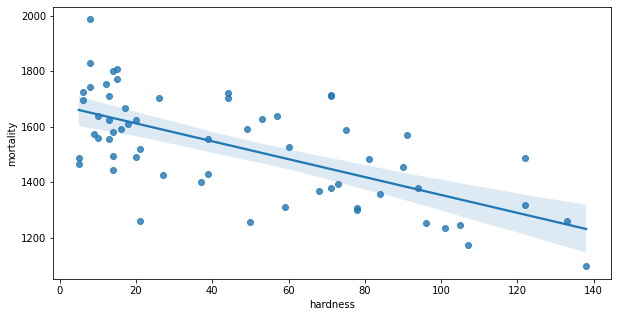

In [ ]:
plt.figure(figsize=(10, 5))
sns.regplot(y=df['mortality'], x=df['hardness'])

Наблюдается обратная корреляция между смертностью и жесткости воды. Чем ниже жесткость воды, тем выше смертность.

### Коэффициенты Пирсона и Спирмена


In [ ]:
pearson_ = df['mortality'].corr(df['hardness'], method='pearson')
spearman_ = df['mortality'].corr( df['hardness'], method='spearman')

print(f'Коээфициент Пирсона: {pearson_.round(2)}')
print(f'Коээфициент Спирмена: {spearman_.round(2)}')

Коээфициент Пирсона: -0.65
Коээфициент Спирмена: -0.63


### Построение модели линейной регрессии

In [ ]:
# Выделение признаков (features) и целевой метки (target)
X = df.drop('mortality', axis=1)
y = df['mortality']

In [ ]:
# Применение One-hot coding для категориальных переменных
X = pd.get_dummies(df.loc[:, ['location', 'town', 'hardness']])
X.head()

,hardness,location_North,location_South,town_Bath,town_Birkenhead,town_Birmingham,town_Blackburn,town_Blackpool,town_Bolton,town_Bootle,...,town_Stockport,town_Stoke,town_Sunderland,town_Swansea,town_Wallasey,town_Walsall,town_West Bromwich,town_West Ham,town_Wolverhampton,town_York
0,105,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
  #  Разбиение данных на тренировочный и валидационный датасет.
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

  print(f'Всего семплов: {X.shape[0]}. На тренировочную выборку отложено: {X_train.shape[0]} записей и на валидацию алгоритма: {X_test.shape[0]}')

Всего семплов: 61. На тренировочную выборку отложено: 45 записей и на валидацию алгоритма: 16


In [ ]:
def model_linear_regression(X_train, X_test, y_train, y_test):

  # инцилизация инстанса модели линейной регрессии
  lr = LinearRegression()

  # Обучение модели на X_train, y_train
  lr.fit(X_train, y_train)

  # Предсказание модели на отложенной тестовой выборке
  y_pred = lr.predict(X_test)

  # Ошибка модели MSE и RMSE:
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  print(f'mse: {mse}')
  print(f'rmse: {rmse}')

  # Коэффициент детерминации r2:
  r2 = lr.score(X_test, y_test)
  print(f'Коээфициент детерминации r2: {r2.round(2)}')

  return y_pred

In [ ]:
y_pred = model_linear_regression(X_train, X_test, y_train, y_test)

mse: 20319.434351488944
rmse: 142.54625337583917
Коээфициент детерминации r2: 0.57


In [ ]:
# Сравнение прогноза с фактом.
pd.DataFrame({'Факт': y_test,
              'Прогнозз': y_pred.round()
             }).head()

,Факт,Прогнозз
20,1723,1598.0
2,1466,1542.0
26,1591,1658.0
3,1800,1662.0
6,1807,1660.0


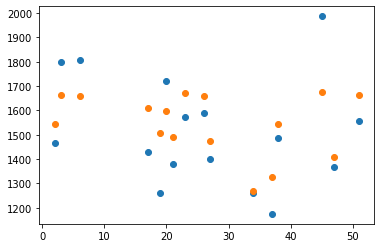

In [ ]:
# Визуализация попадания y_pred в y_test
plt.scatter(y_test.index, y_test)
plt.scatter(y_test.index, y_pred)
plt.show()

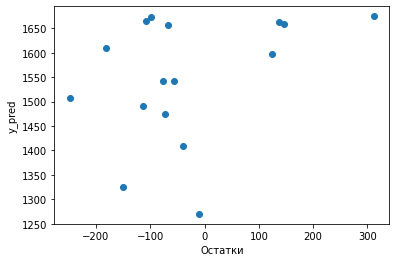

In [ ]:
# Построение остатков
residuals = y_test-y_pred
plt.scatter(residuals, y_pred)
plt.xlabel('Остатки')
plt.ylabel('y_pred')
plt.show()

Из графика остатков видно, что отклонение y_test от y_pred находятся в диапазоне -300 до 300 и распределены без какой-либо закономерности.

### Задание 2

####2.1 Южные регионы

In [ ]:
south = df[df['location'] == 'South']
south = south.drop('location', axis=1)

pearson_south = south['mortality'].corr(south['hardness'], method='pearson')
spearman_south = south['mortality'].corr(south['hardness'], method='spearman')

print(f'Коээфициент Пирсона: {pearson_south.round(2)}')
print(f'Коээфициент Спирмена: {spearman_south.round(2)}')

Коээфициент Пирсона: -0.6
Коээфициент Спирмена: -0.6


In [ ]:
# Подготовка данных и разбиение датасета на train и test
X = south.drop('mortality', axis=1)
y = south['mortality']

X = pd.get_dummies(south.loc[:, ['town', 'hardness']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
print(f'Всего семплов: {X.shape[0]}. На тренировочную выборку отложено: {X_train.shape[0]} записей и на валидацию алгоритма: {X_test.shape[0]}')

Всего семплов: 26. На тренировочную выборку отложено: 18 записей и на валидацию алгоритма: 8


In [ ]:
# Оценка качества алгоритма
y_pred_south = model_linear_regression(X_train, X_test, y_train, y_test)

mse: 7676.384672763932
rmse: 87.61497972814884
Коээфициент детерминации r2: 0.5


####2.1 Северные регионы

In [ ]:
north = df[df['location'] == 'North']
north = df.drop('location', axis=1)

pearson_north = north['mortality'].corr(north['hardness'], method='pearson')
spearman_north = north['mortality'].corr(north['hardness'], method='spearman')

print(f'Коээфициент Пирсона: {pearson_north.round(2)}')
print(f'Коээфициент Спирмена: {spearman_north.round(2)}')

Коээфициент Пирсона: -0.65
Коээфициент Спирмена: -0.63


In [ ]:
X = north.drop('mortality', axis=1)
y = north['mortality']

X = pd.get_dummies(north.loc[:, ['town', 'hardness']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)
print(f'Всего семплов: {X.shape[0]}. На тренировочную выборку отложено: {X_train.shape[0]} записей и на валидацию алгоритма: {X_test.shape[0]}')

Всего семплов: 61. На тренировочную выборку отложено: 45 записей и на валидацию алгоритма: 16


In [ ]:
y_pred_north= model_linear_regression(X_train, X_test, y_train, y_test)

mse: 31102.385709725837
rmse: 176.35868481513984
Коээфициент детерминации r2: 0.34


При разделении данных на южные и северные территории точность модели падает (r2_score, rmse). Вероятно, это связано с тем, что требуется больше данных для выявления закономерностей. В качестве улучшения r2_score рекомендуется собрать больше наблюдений по указанным регионам, либо попробовать применить кросс-валидацию.